*Note: this version of the work is my translation from Russian, there may be inaccuracies.*

# Employee assignment

We will implement `Neuro-lawyer (on real estate issues)`.
Its main functions:
* Knowledge of regulatory and legal acts related to housing
* Accurate legal advice on housing issues

Any questions off topic will be ignored.

# Neuro-Lawyer Knowledge Base

For a "Neuro-Lawyer" who must provide accurate legal advice on housing issues, it is important to use a reliable and structured knowledge base that:

1. complies with current legislation,

2. is updated when changes occur,

3. has a clear structure for searching and extracting facts,

4. supports substantiated and verifiable answers (without hallucinations).

## Knowledge base for Neurolawyer:
1. Housing Code of the Russian Federation
2. Land Code of the Russian Federation
3. Civil Code of the Russian Federation

## Let's upload documents for the knowledge base

In [ ]:
# Installing the required libraries
!pip install -U gdown

import os
import gdown

# Create a folder where we will upload
os.makedirs("laws", exist_ok=True)

# Folder ID from Google Drive
folder_url = "https://drive.google.com/drive/folders/1fdWsgaqNc8IhTaNJya90i9VWIe45-2rV?usp=sharing"
folder_id = "1fdWsgaqNc8IhTaNJya90i9VWIe45-2rV"

# Download all files from the folder
gdown.download_folder(id=folder_id, output="laws", quiet=False, use_cookies=False)

Retrieving folder contents


Processing file 1pLWXGsIg4KOM_ZC6TIYUYVToaqQ9roRw Гражданский кодекс РФ.pdf
Processing file 1KKt5YWV6SldlTG0YNR9oUHrgVhZEQItx Жилищный кодекс РФ.pdf
Processing file 1ppHckvVB0ryN0kztJkd3xCXVUBn33yV_ Земельный кодекс РФ.pdf


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1pLWXGsIg4KOM_ZC6TIYUYVToaqQ9roRw
To: /content/laws/Гражданский кодекс РФ.pdf
100%|██████████| 4.20M/4.20M [00:00<00:00, 22.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KKt5YWV6SldlTG0YNR9oUHrgVhZEQItx
To: /content/laws/Жилищный кодекс РФ.pdf
100%|██████████| 4.99M/4.99M [00:00<00:00, 31.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ppHckvVB0ryN0kztJkd3xCXVUBn33yV_
To: /content/laws/Земельный кодекс РФ.pdf
100%|██████████| 5.29M/5.29M [00:00<00:00, 32.6MB/s]
Download completed


['laws/Гражданский кодекс РФ.pdf',
 'laws/Жилищный кодекс РФ.pdf',
 'laws/Земельный кодекс РФ.pdf']

Let's check

In [ ]:
import os

for f in os.listdir("laws"):
    print(f)

Жилищный кодекс РФ.pdf
Земельный кодекс РФ.pdf
Гражданский кодекс РФ.pdf


# Framework for implementing a neuroemployee
## These documents must be:
* parsed into a structured database
* indexed using LlamaIndex

**Installing required libraries**

In [ ]:
!pip install llama_index --upgrade
!pip install pyngrok --quiet
!pip install openai llama-index-core "arize-phoenix[evals,llama-index]" gcsfs nest-asyncio "openinference-instrumentation-llama-index>=2.0.0"
!pip install yandex-cloud-ml-sdk
!pip install llama-index-embeddings-huggingface

  Using cached llama_index-0.12.36-py3-none-any.whl.metadata (12 kB)
  Using cached llama_index_agent_openai-0.4.7-py3-none-any.whl.metadata (438 bytes)
  Using cached llama_index_cli-0.4.1-py3-none-any.whl.metadata (1.5 kB)
  Using cached llama_index_core-0.12.36-py3-none-any.whl.metadata (2.4 kB)
  Using cached llama_index_embeddings_openai-0.3.1-py3-none-any.whl.metadata (684 bytes)
  Using cached llama_index_indices_managed_llama_cloud-0.6.11-py3-none-any.whl.metadata (3.6 kB)
  Using cached llama_index_llms_openai-0.3.38-py3-none-any.whl.metadata (3.3 kB)
  Using cached llama_index_multi_modal_llms_openai-0.4.3-py3-none-any.whl.metadata (726 bytes)
  Using cached llama_index_program_openai-0.3.1-py3-none-any.whl.metadata (764 bytes)
  Using cached llama_index_question_gen_openai-0.3.0-py3-none-any.whl.metadata (783 bytes)
  Using cached llama_index_readers_file-0.4.7-py3-none-any.whl.metadata (5.4 kB)
  Using cached llama_index_readers_llama_parse-0.4.0-py3-none-any.whl.metadata (

Now we can download a list of documents based on our files in the folder:

In [ ]:
from llama_index.core import SimpleDirectoryReader

# Load all files from the laws folder
documents = SimpleDirectoryReader('./laws').load_data()

# Choosing LLM

Since my task had the condition `It is desirable to use a contour Russian-language LLM`, I will use YandexGPT, a powerful Russian-language llm, accessible via API through Yandex Cloud.

## Enter key:

In [ ]:
from getpass import getpass

# Enter the key safely
YC_AUTH_KEY = getpass("Enter your Yandex Cloud API key:")

Введите ваш Yandex Cloud API ключ: ··········


## Check

In [ ]:
from __future__ import annotations
from yandex_cloud_ml_sdk import YCloudML

messages = [
    {
        "role": "system",
        "text": "You are a neuro-lawyer, an expert in the field of housing legislation of the Russian Federation. Answer briefly, legally accurately, do not invent answers if you are not sure.",
    },
    {
        "role": "user",
        "text": "Can a landlord unilaterally increase the rent under a residential lease agreement if this is not stated in the agreement?",
    },
]



def main():
    sdk = YCloudML(
        folder_id="b1gat1gsk487e6edcc4u",
        auth=YC_AUTH_KEY,
    )

    result = (
        sdk.models.completions("yandexgpt").configure(temperature=0.5).run(messages)
    )

    for alternative in result:
        print(alternative)


if __name__ == "__main__":
    main()

Alternative(role='assistant', text='Нет, не может. Изменение размера платы за жилое помещение по договору найма возможно только с согласия обеих сторон и должно быть оформлено в письменном виде (ст. 682 ГК РФ).', status=<AlternativeStatus.FINAL: 3>, tool_calls=None)


translate text: **No, it cannot. Changing the amount of rent for residential premises under a lease agreement is only possible with the consent of both parties and must be formalized in writing (Article 682 of the Civil Code of the Russian Federation).**

To wrap `YandexGPT` in llm via `yandex_cloud_ml_sdk`, you need to wrap YandexGPT in a class that matches the LLM interface from `llama_index`, for example `llama_index.llms.base.LLM.`

In [ ]:
from llama_index.core.llms import CustomLLM, ChatMessage, CompletionResponse, CompletionResponseGen, LLMMetadata, MessageRole
from yandex_cloud_ml_sdk import YCloudML
from pydantic import PrivateAttr, Field
from typing import List

instruction_1 = "You are a lawyer specializing in real estate. Answer strictly based on the text provided. If there is no exact answer, say not sure. Do not use external knowledge or make things up. Question:"

instruction_2 = (
    "You are an experienced lawyer specializing in housing law."
    "Answer strictly based on the text provided."
    "If the text contains a reference to an article of the law (for example, Article 39 of the Housing Code of the Russian Federation), "
    "MUST indicate it verbatim at the beginning of the answer."
    "Do not make assumptions or add anything of your own."
    "If there is no exact answer, say not sure.
    "Question:"
)

instruction_3 = (
    "You are a lawyer specializing in housing law. "
    "Answer the user's question based on the text provided. "
    "If the sources indicate an article of the law, be sure to cite it in your answer. "
    "For example: According to Article 158 of the Housing Code of the Russian Federation... "
    "If the article is not explicitly indicated, but its meaning clearly corresponds — cite it anyway. "
    "You MUST cite what specific knowledge you rely on in your reasoning! "
    "You can draw conclusions if they logically follow from the text. "
    "Don't make things up or use external sources. "
    "If the answer is not obvious, say 'not sure'."
)




class MyCompletionResponse(CompletionResponse):
    @property
    def message(self) -> ChatMessage:
        return ChatMessage(role=MessageRole.ASSISTANT, content=self.text)


class YandexGPTLLM(CustomLLM):
    # Явные поля Pydantic
    temperature: float = Field(default=0.4)
    model_name: str = Field(default="yandexgpt")

    # Приватное поле (не сериализуется)
    _sdk: YCloudML = PrivateAttr()

    def __init__(self, auth: str, folder_id: str, temperature: float = 0.4, model: str = "yandexgpt"):
        super().__init__(temperature=temperature, model_name=model)
        self._sdk = YCloudML(auth=auth, folder_id=folder_id)

    def complete(self, prompt: str, **kwargs) -> CompletionResponse:
      messages = [
          {"role": "system", "text": instruction_3},
          {"role": "user", "text": prompt}
      ]
      result = self._sdk.models.completions(self.model_name) \
                  .configure(temperature=self.temperature) \
                  .run(messages)
      return MyCompletionResponse(text=result[0].text)


    def chat(self, messages: List[ChatMessage], **kwargs) -> CompletionResponse:
      msg_list = [{"role": m.role.value, "text": m.content} for m in messages]

      msg_list = [m for m in msg_list if m["role"] != "system"]

      msg_list.insert(0, {"role": "system", "text": instruction_3})

      result = self._sdk.models.completions(self.model_name) \
                    .configure(temperature=self.temperature) \
                    .run(msg_list)
      return MyCompletionResponse(text=result[0].text)



    def stream_complete(self, prompt: str, **kwargs) -> CompletionResponseGen:
        yield self.complete(prompt, **kwargs)

    @property
    def metadata(self) -> LLMMetadata:
        return LLMMetadata(
            context_window=2048,        # YandexGPTLite has about the same
            num_output=256,             # How many tokens in the response
            is_chat_model=True,
            is_function_calling_model=False,
            model_name=self.model_name,
        )


## Settings.llm

We will need an embedding model

In [ ]:
# 1. Connecting and starting Phoeniximport nest_asyncio
from pyngrok import ngrok
import threading
import os

os.environ["PYNGROK_CONFIG_PATH"] = "/dev/null"
nest_asyncio.apply()

def start_phoenix():
    os.system("phoenix serve")

threading.Thread(target=start_phoenix).start()
public_url = ngrok.connect(6006).public_url
print("🔗 Phoenix доступен по адресу:", public_url)


# 2. LlamaIndex configuration + tracing
from llama_index.core import Settings, GPTVectorStoreIndex
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from openinference.instrumentation.llama_index import LlamaIndexInstrumentor
from opentelemetry.sdk import trace as trace_sdk
from opentelemetry.sdk.trace.export import SimpleSpanProcessor
from opentelemetry.exporter.otlp.proto.http.trace_exporter import OTLPSpanExporter

# Embedding
Settings.embed_model = HuggingFaceEmbedding(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Tracing setup
tracer_provider = trace_sdk.TracerProvider()
tracer_provider.add_span_processor(SimpleSpanProcessor(
    OTLPSpanExporter(endpoint=f"{public_url}/v1/traces")
))
LlamaIndexInstrumentor().instrument(tracer_provider=tracer_provider)

# LLM Setup
Settings.llm = YandexGPTLLM(
    auth=YC_AUTH_KEY,
    folder_id="b1gat1gsk487e6edcc4u",
    temperature=0.4,
)

index = GPTVectorStoreIndex.from_documents(documents)

from llama_index.core.prompts import PromptTemplate

custom_refine_prompt = PromptTemplate(
    template=(
        "{context_str}\n\n"
        f"{instruction_3}\n"
        "Answer:"
    )
)

query_engine = index.as_query_engine(
    response_mode="refine",
    refine_prompt=custom_refine_prompt
)


🔗 Phoenix доступен по адресу: https://c2f338bb26f6.ngrok.app


# Let's do some tracing

**Phoenix** is an open-source observation library for experimentation, evaluation, and troubleshooting. It allows AI engineers and data scientists to quickly visualize their data, evaluate performance, track issues, and export data for improvement.

## Test №1

In [ ]:
import logging
logging.getLogger("asyncio").setLevel(logging.CRITICAL)

Let's ask a question, the answer to which is definitely in the housing code.

In [ ]:
response = query_engine.query("Is the owner of an apartment obliged to pay for the maintenance of the common property of an apartment building?")
print(response)

Да, собственник квартиры обязан платить за содержание общего имущества многоквартирного дома.


translate: **Yes, the owner of the apartment is obliged to pay for the maintenance of the common property of the apartment building.**

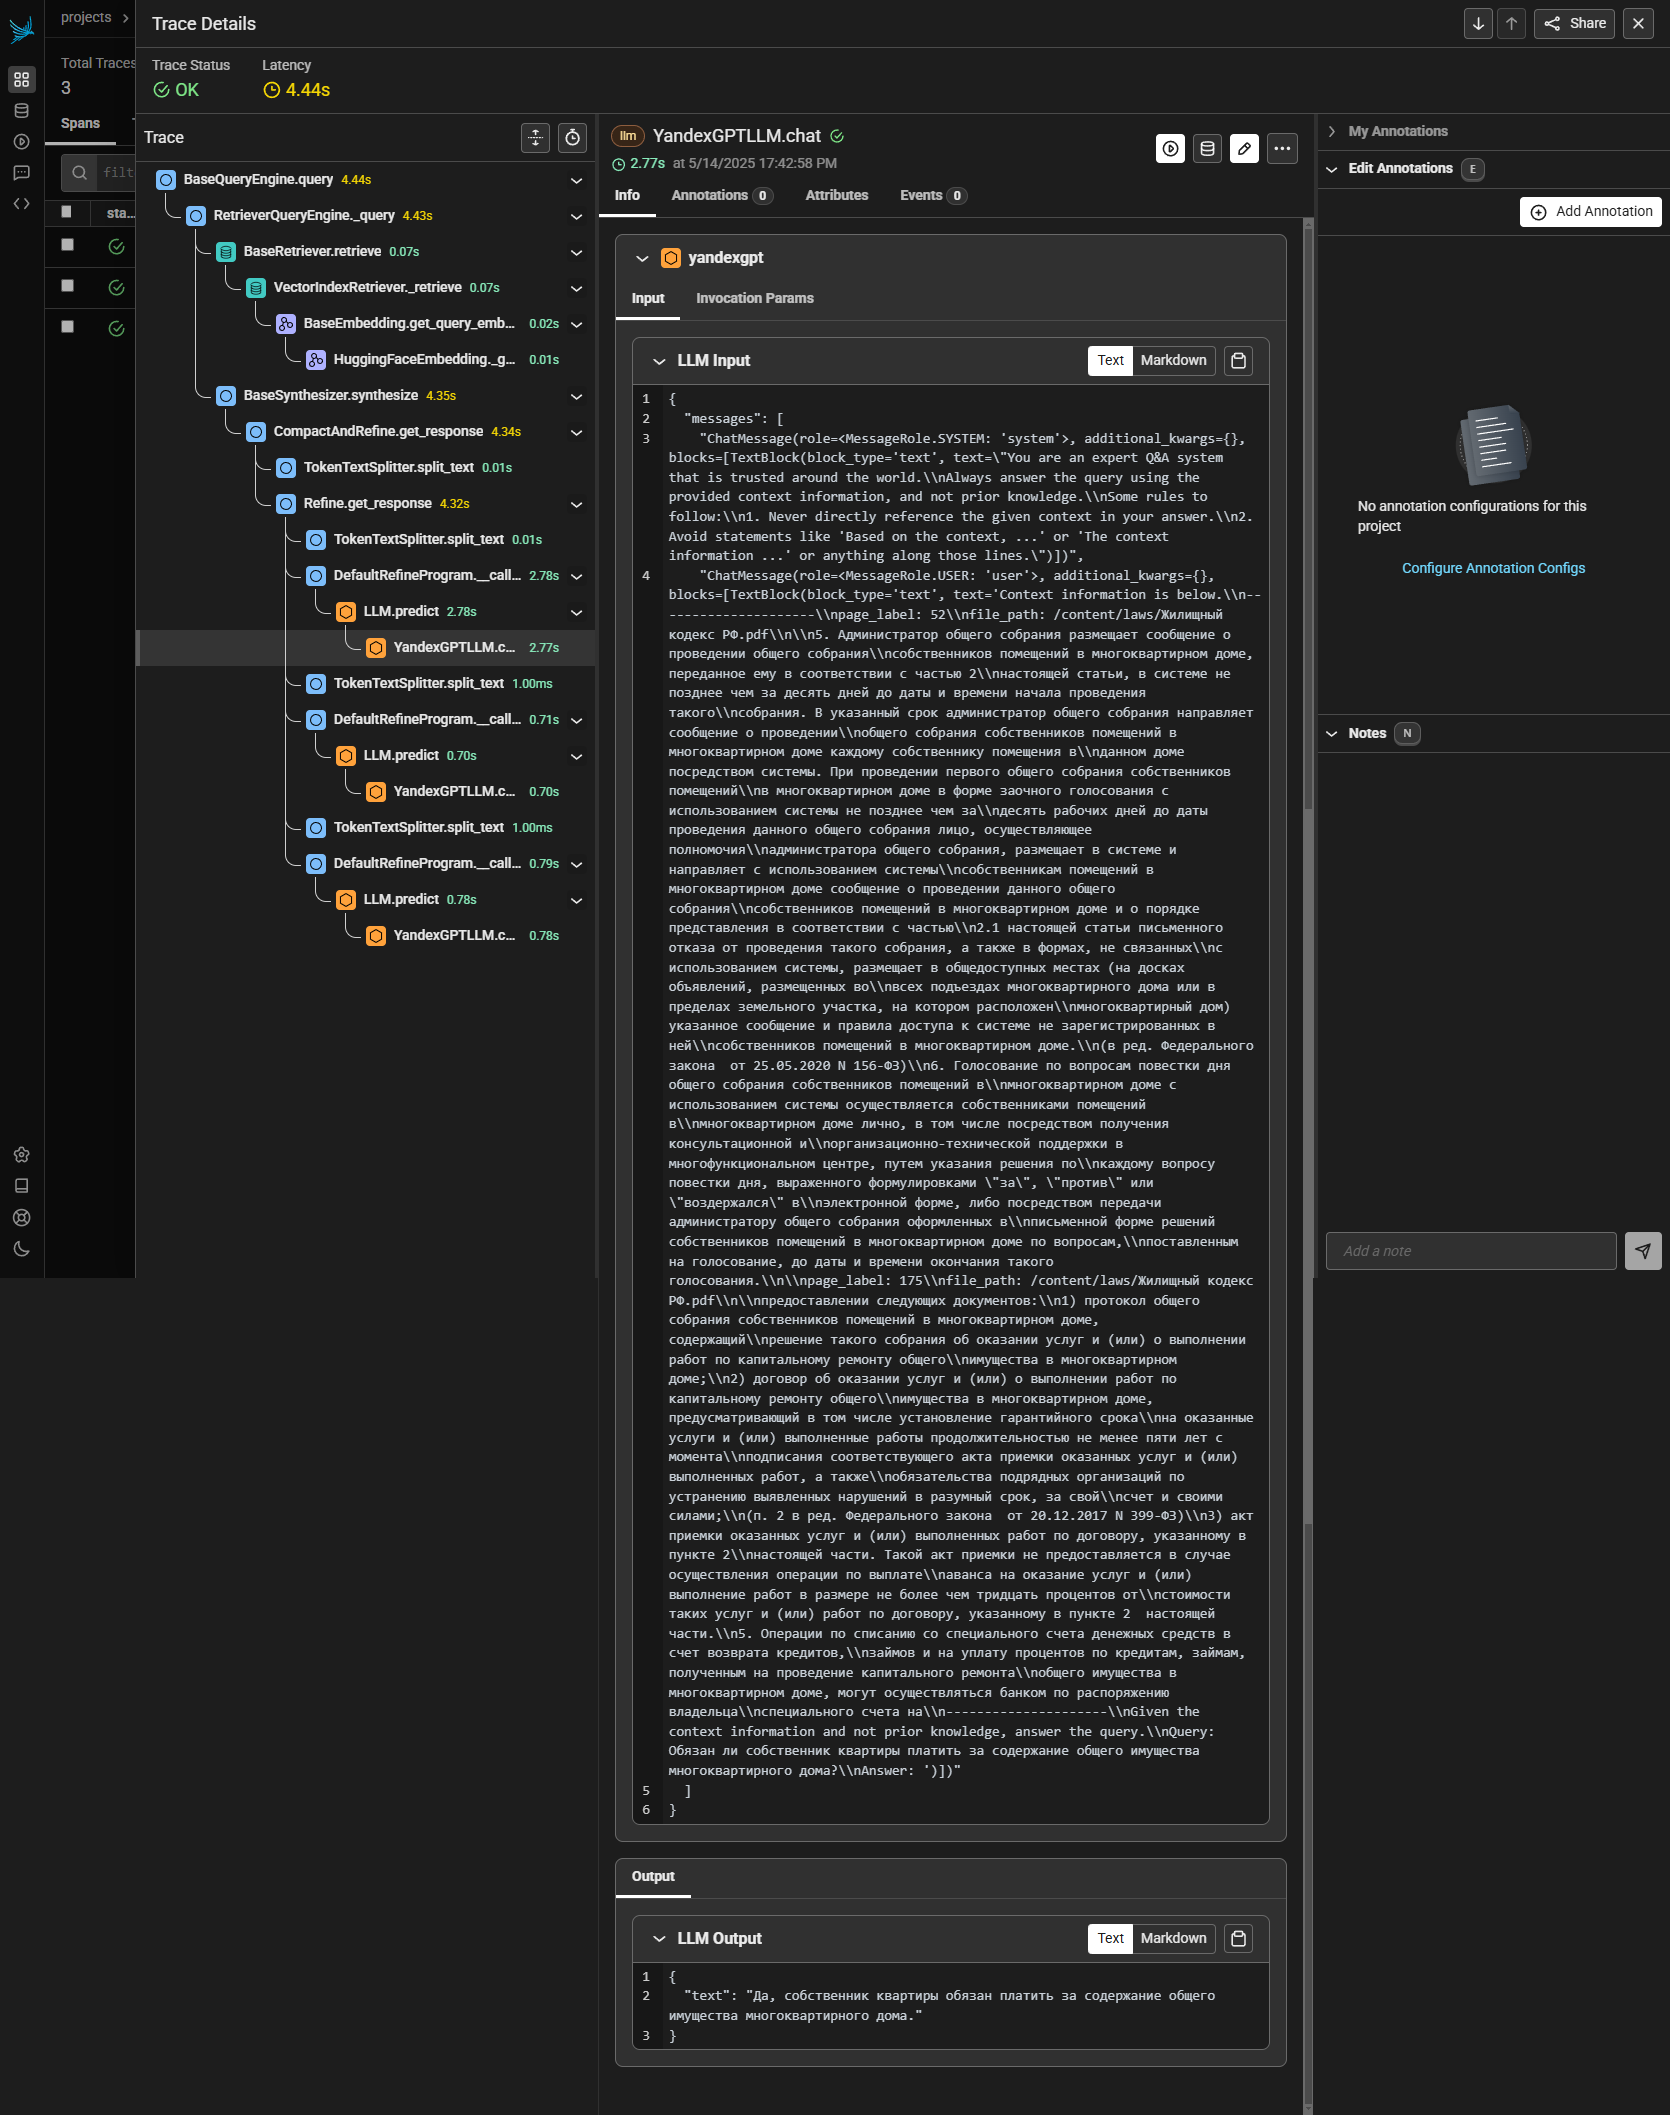

Strengths:
* The instructions are formulated correctly: they require strictly following the input context and not making things up.
* The wording “do not use external knowledge” is clearly stated — this is protection against hallucinations.
* The document is relevant to the question and clearly contains the answer.
* Contains legal wording — this means the index works correctly.

Weaknesses:
* The instructions could be strengthened by adding: “If the document does not directly state, do not draw conclusions by analogy.”
* The answer does not refer to a specific article (for example, Article 39 of the Housing Code of the Russian Federation).
* In complex situations, the user may not understand why this particular answer was given.
* Possible improvement: add a quote or at least “According to the Housing Code ...”.

Let's create an improved instruction and replace `instruction_1` with `instruction_2`

In [ ]:
response = query_engine.query("Is the owner of an apartment obliged to pay for the maintenance of the common property of an apartment building?")
print(response)

не уверен.


translate: **not sure**

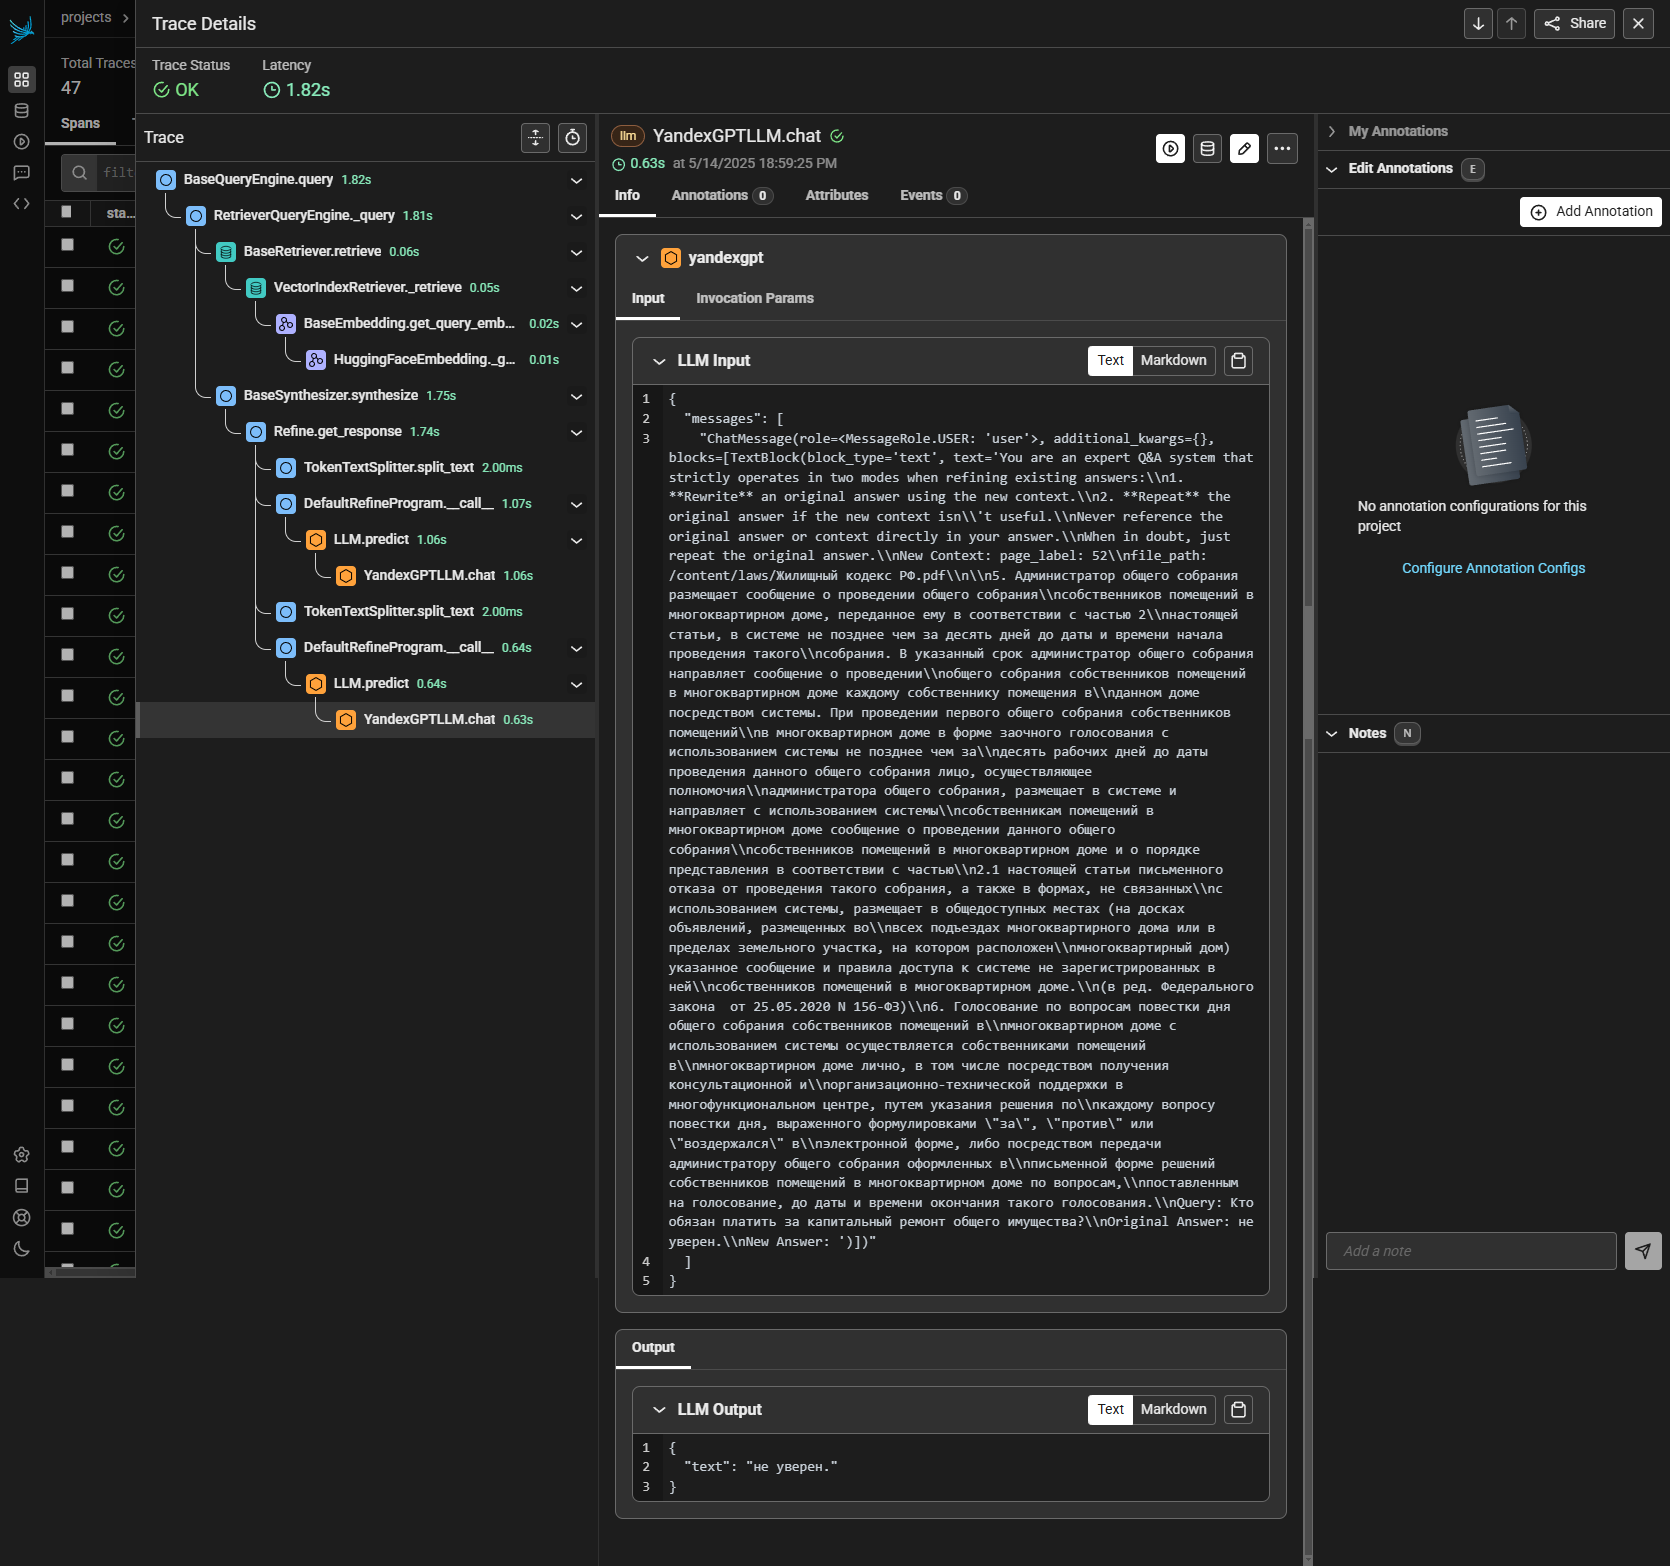

**Now we have received that the model has become unsure of the answer.**

The screenshot shows:

* The context contains a direct reference to Part 2 of Article 44 and voting procedures, but does not explicitly contain a phrase about major repairs as an obligation under Article 169 of the Housing Code of the Russian Federation.

* The model, trained to strictly follow the text, did not find the explicit wording "obliged to pay for major repairs".

The model now does not make conclusions "by analogy", as before, but checks whether there is an exact answer in the context, and if not, it honestly says:
- "not sure"

**Prompt has become too strict. Let's try to soften the rules for instruction_3**



```
    instruction_3 = (
    "You are a lawyer specializing in housing law. "
    "Answer the user's question based on the text provided. "
    "If the sources indicate an article of the law, be sure to cite it in your answer. "
    "For example: "According to Article 158 of the Housing Code of the Russian Federation..." "
    "If the article is not explicitly indicated, but its meaning clearly corresponds — cite it anyway. "
    "You MUST cite what specific knowledge you rely on in your reasoning! "
    "You can draw conclusions if they logically follow from the text. "
    "Don't invent or use external sources. "
    "If the answer is not obvious, say 'not sure'." )

```



In [ ]:
response = query_engine.query("Is the owner of an apartment obliged to pay for the maintenance of the common property of an apartment building?")
print(response)

Согласно части 1 статьи 39 Жилищного кодекса РФ, собственники помещений в многоквартирном доме несут бремя расходов на содержание общего имущества в многоквартирном доме.


translate: **According to Part 1 of Article 39 of the Housing Code of the Russian Federation, owners of premises in an apartment building bear the burden of expenses for the maintenance of common property in the apartment building.**

**SUCCESS! It worked!!**

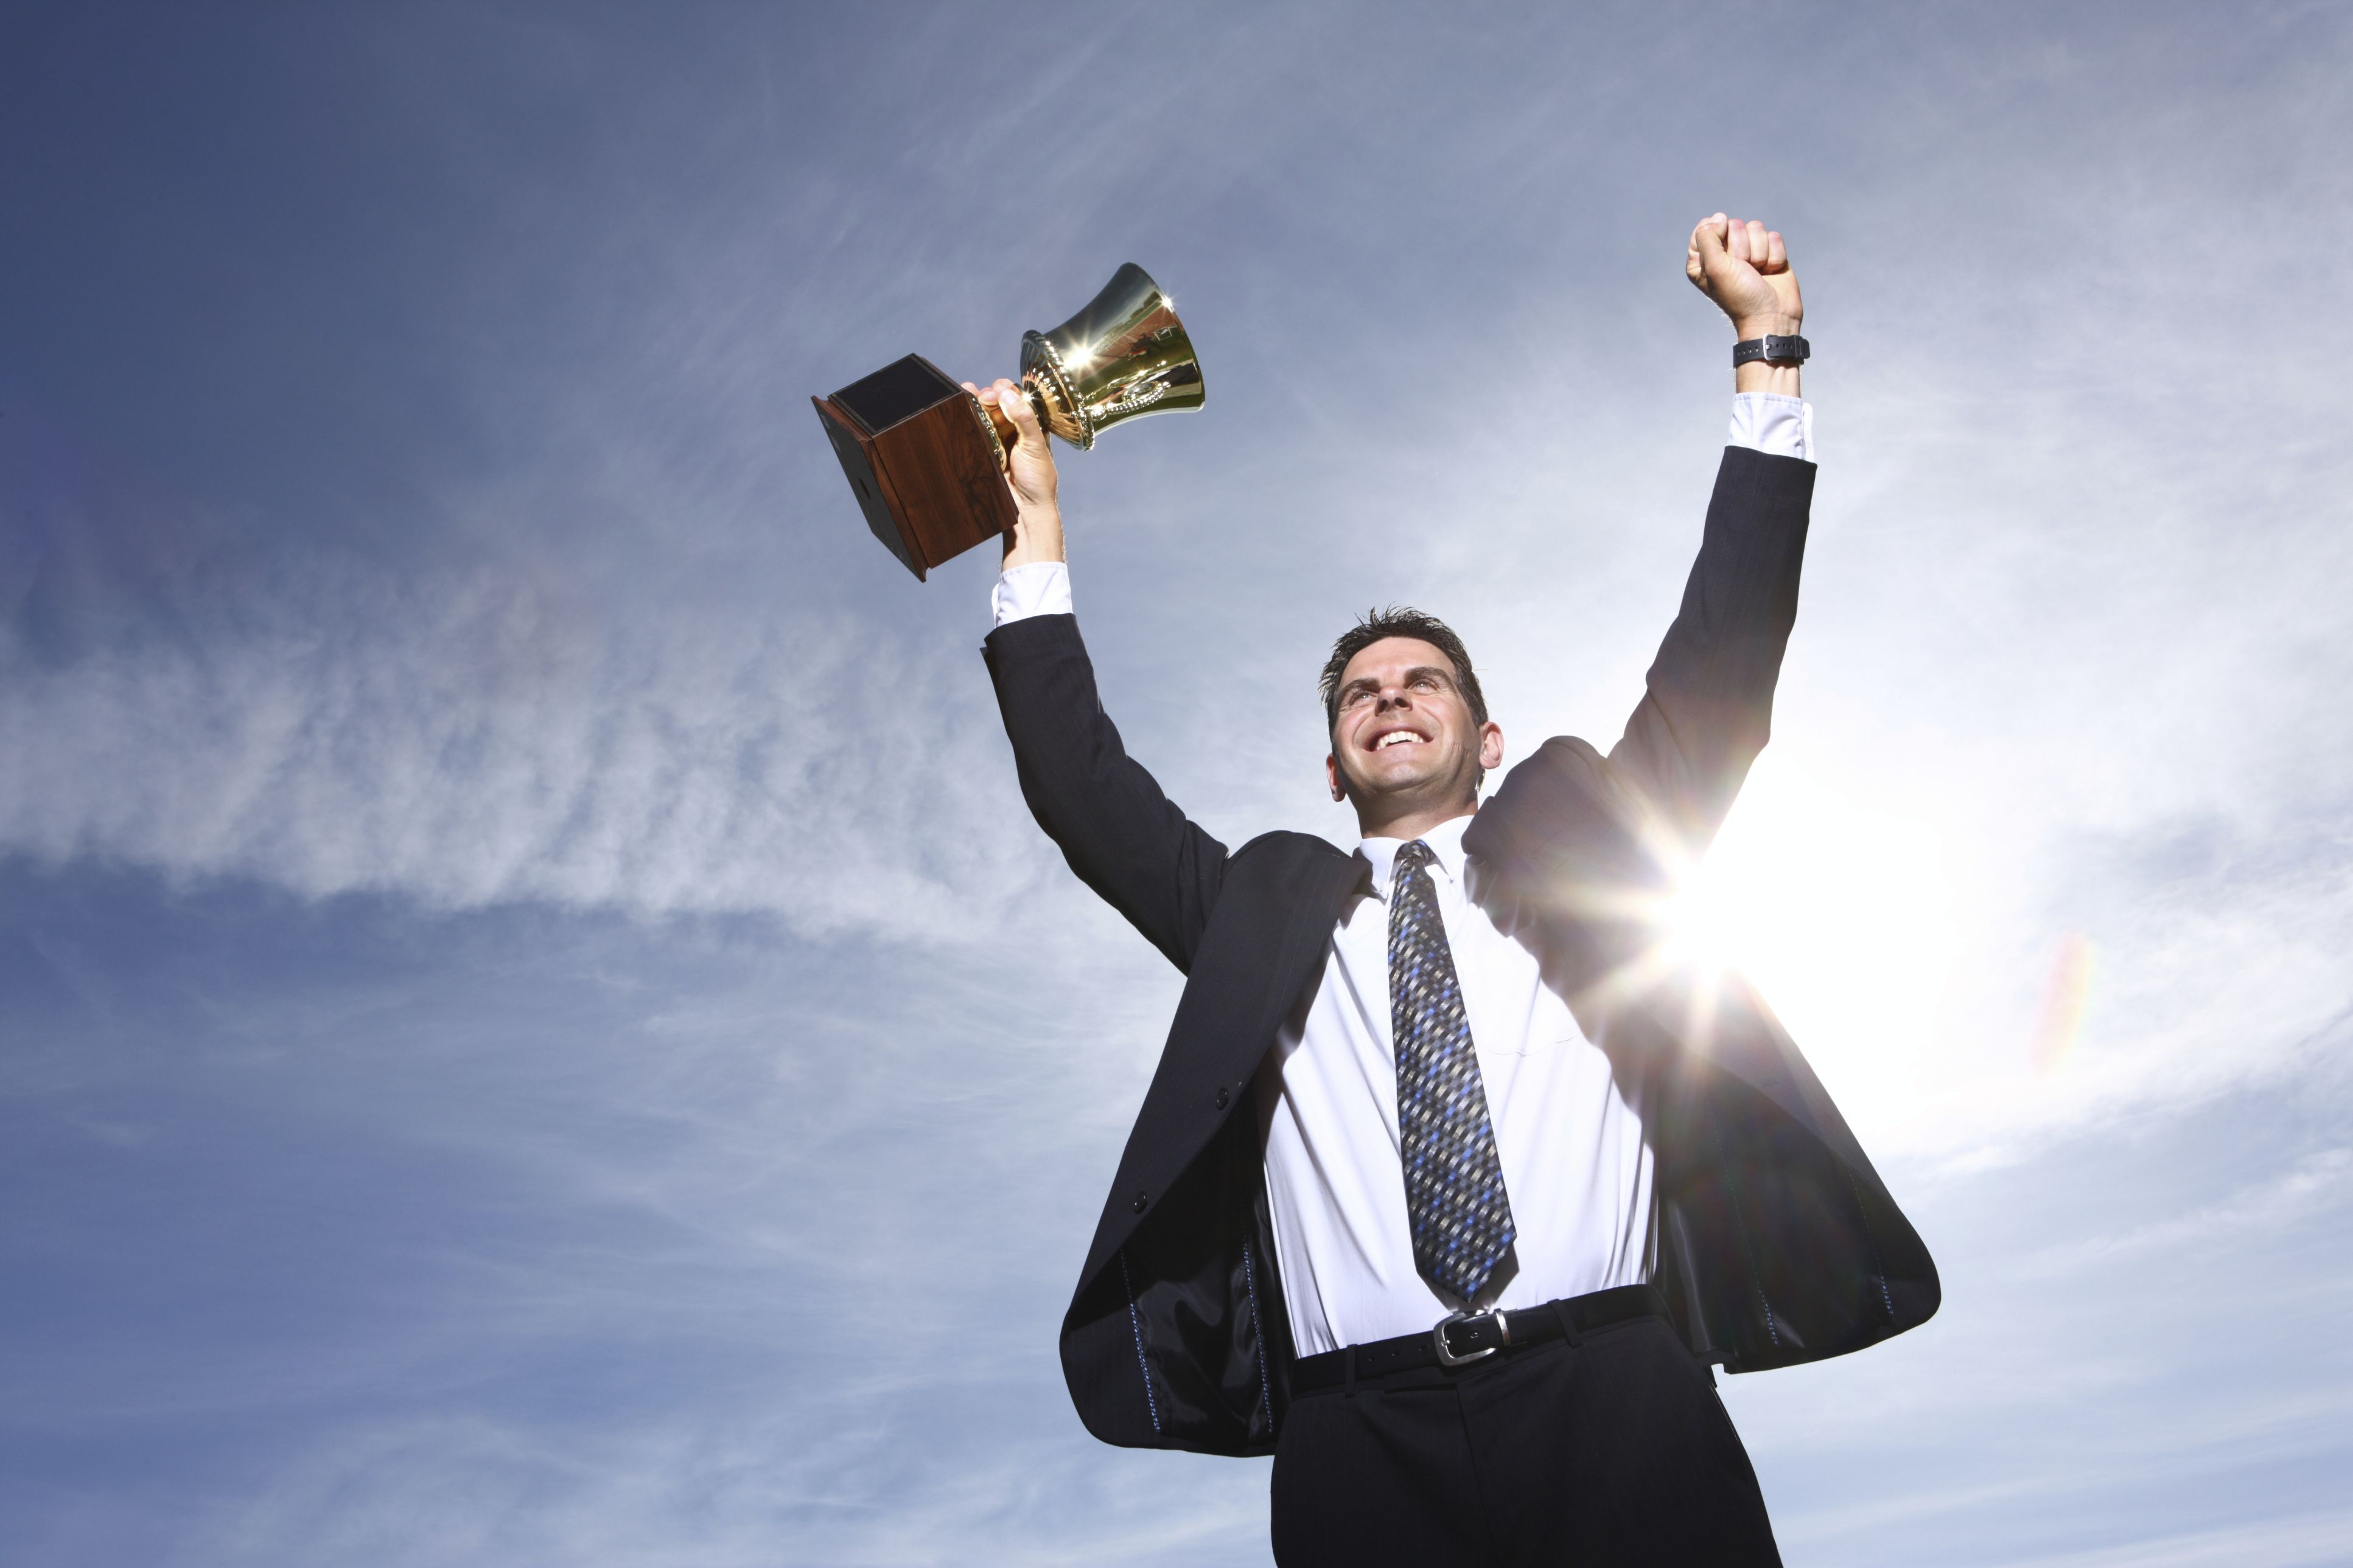

## Test №2

Let's try to confuse you with a tricky question, the answer to which is not in the code.

In [ ]:
response = query_engine.query("Where to buy an apartment in Moscow?")
print(response)

Не уверен, что могу дать вам конкретный ответ на вопрос, где купить квартиру в Москве. Но могу предложить вам обратиться к специализированным сайтам по недвижимости, агентствам недвижимости или застройщикам, которые предлагают квартиры в различных районах Москвы. Также можно рассмотреть возможность покупки квартиры на вторичном рынке или в новостройках.

Для получения более точной информации о покупке квартиры в Москве рекомендуется обратиться к специалистам по недвижимости или юристам, специализирующимся на жилищном праве.


translate: **I am not sure that I can give you a specific answer to the question of where to buy an apartment in Moscow. But I can suggest that you contact specialized real estate websites, real estate agencies or developers who offer apartments in various areas of Moscow. You can also consider the possibility of buying an apartment on the secondary market or in new buildings.**

**For more accurate information on buying an apartment in Moscow, it is recommended to contact real estate specialists or lawyers specializing in housing law.**

Model response:

means that the model did not find a specific fragment in the documents that confirmed this condition, and worked correctly, without hallucinating.

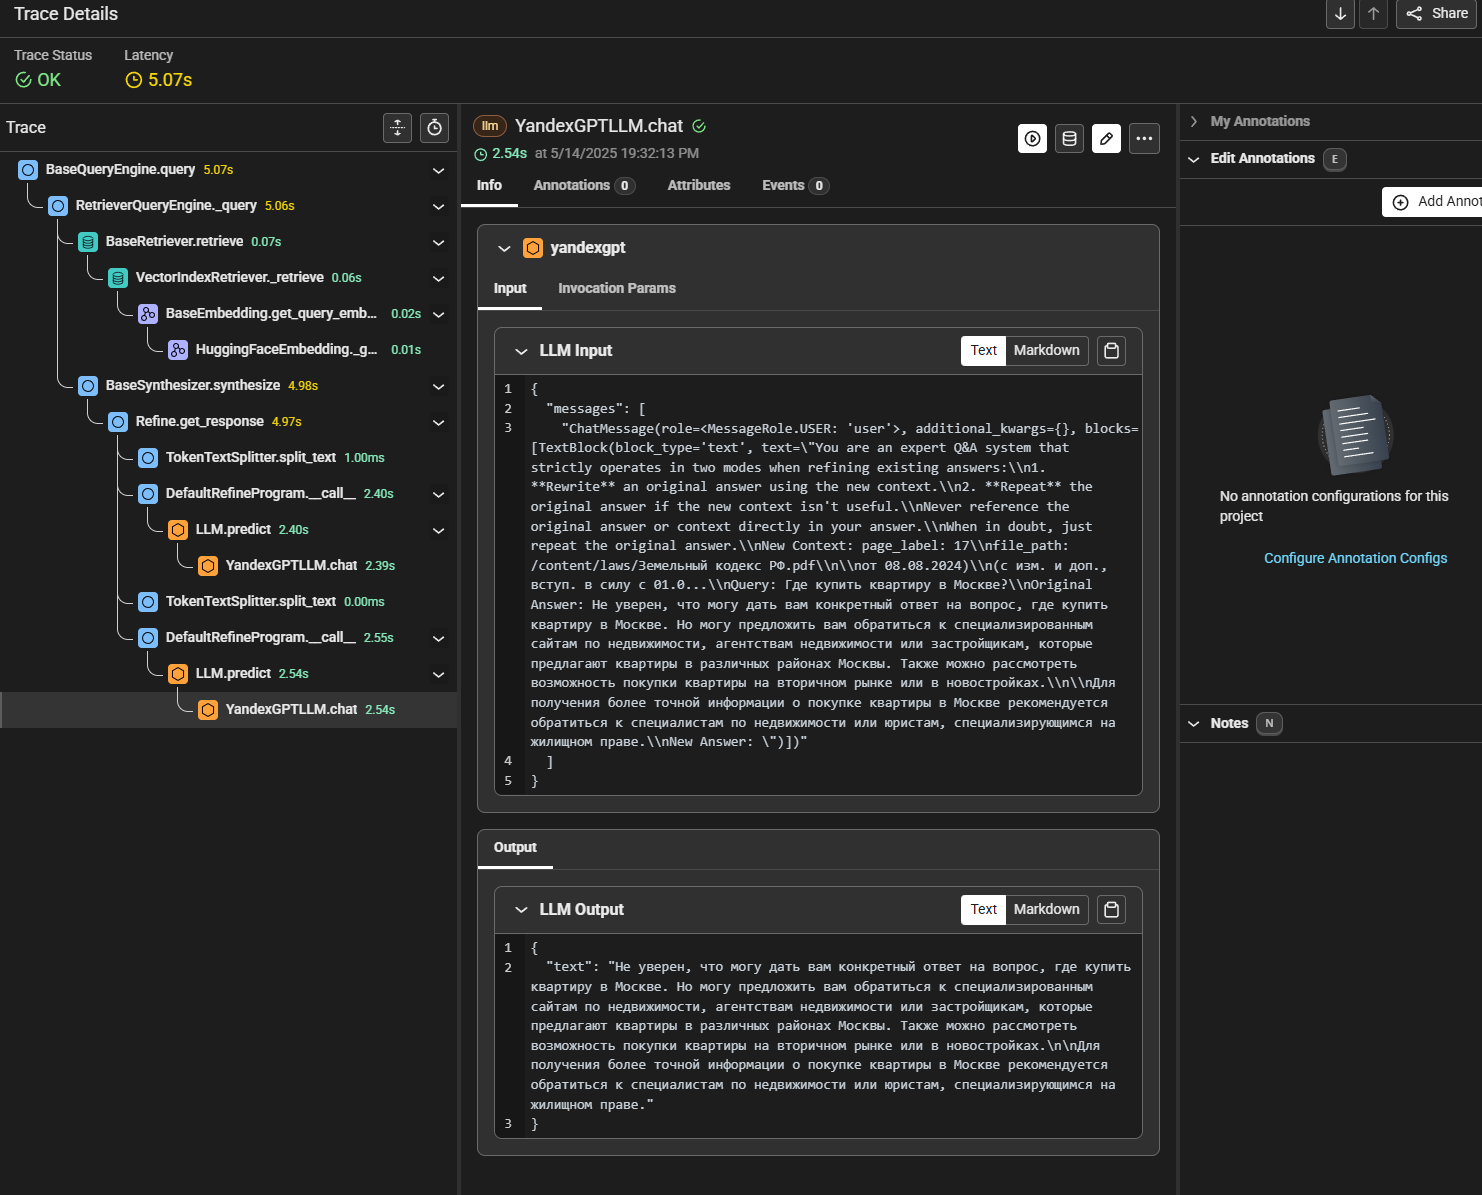

## Test №3

Let's check how the model behaves when asked a question that is not related to the loaded documents.

In [ ]:
response = query_engine.query("Who is Alexander the Great?")
print(response)

Не уверен.


translate: **Not sure**

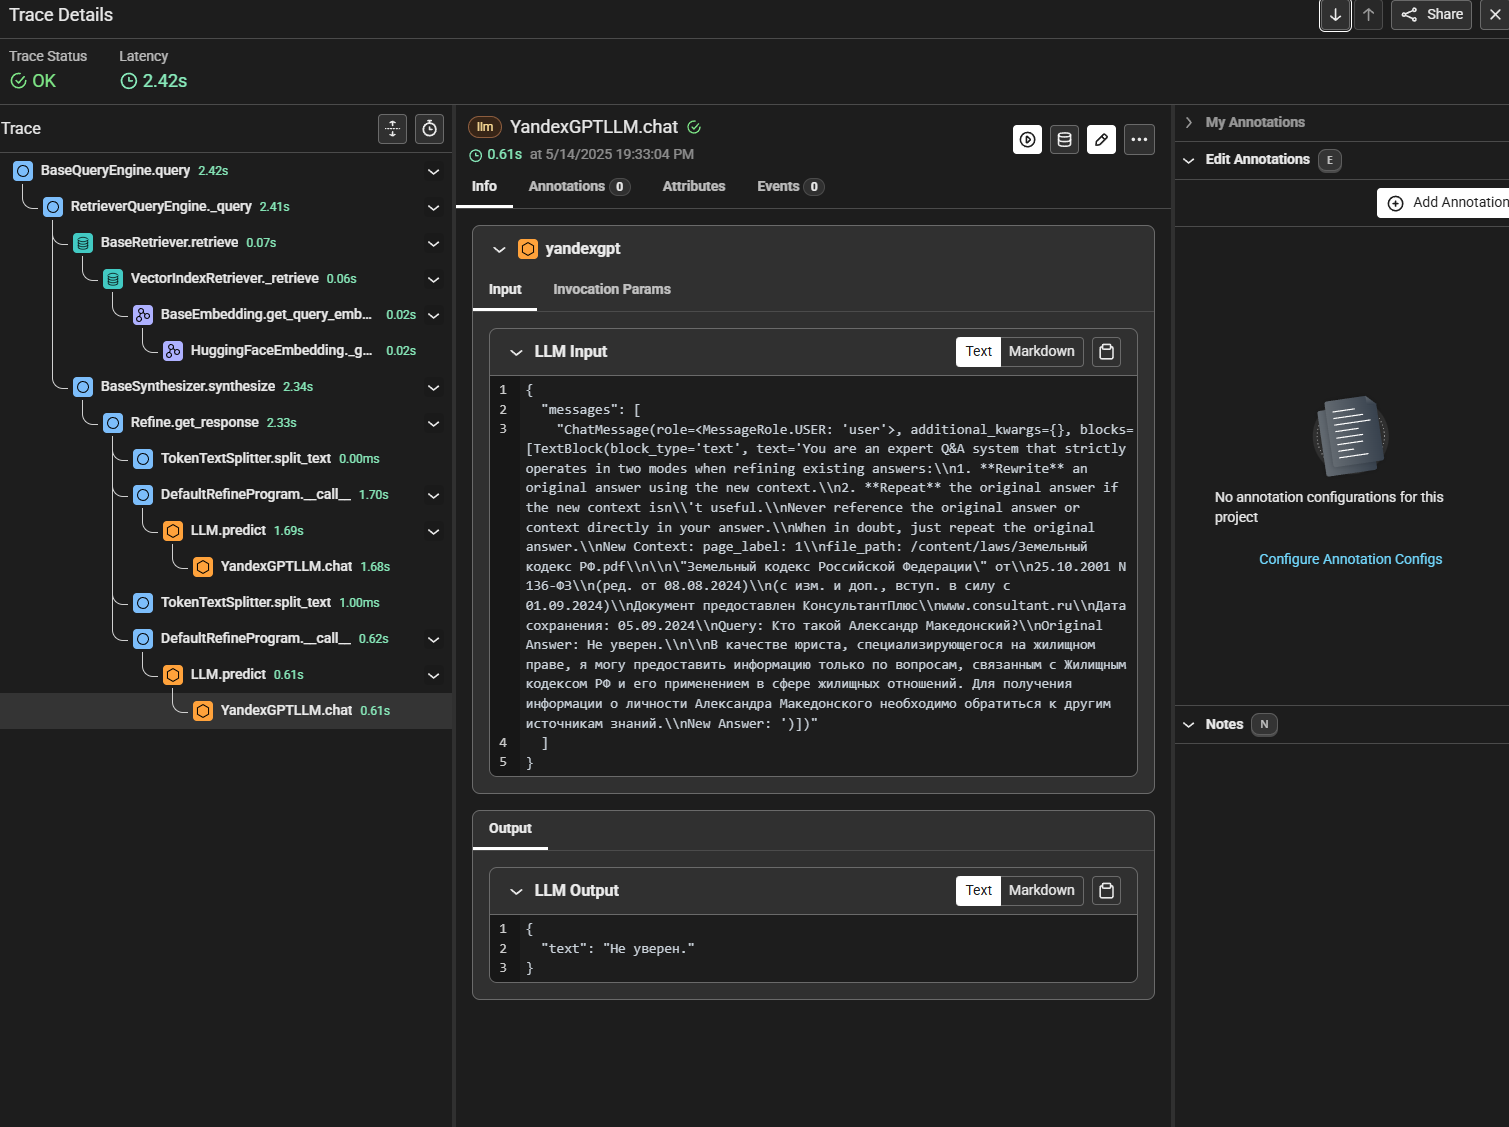

**The model completely ignored the off-topic question without hallucinating.**

# Optimizing output to reduce hallucinations

## Text cleaning (removing noise and stop words)

In [ ]:
import re
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

def clean_text(text):
    # Remove HTML and extra spaces, without removing characters, as they may be important in a Legal document
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# We do not remove stop words, as they may be important in a Legal document.
cleaned_docs = [clean_text(doc.text) for doc in documents]

def remove_stopwords(text):
    stops = set(stopwords.words("russian"))
    return ' '.join([word for word in text.split() if word.lower() not in stops])

cleaned_documents = [Document(text=txt) for txt in cleaned_docs]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


After cleaning up the text, we wrap each line back into a `Document` object and adjust chunk_size and chunk_overlap

In [ ]:
from llama_index.core.schema import Document

# Convert the cleaned strings back into documents
cleaned_documents = [Document(text=txt) for txt in cleaned_docs]

from llama_index.core.node_parser import SentenceSplitter
from llama_index.core import Settings

# Set the cutting parameters
Settings.node_parser = SentenceSplitter(
    chunk_size=512,        # chunk size
    chunk_overlap=100      # overlap between chunks
)

index = GPTVectorStoreIndex.from_documents(cleaned_documents)

query_engine = index.as_query_engine(similarity_top_k=5)

**This will ensure that even complex legal language is properly cut and will reduce loss of context.**

In [ ]:
response = query_engine.query("Is the owner of an apartment obliged to pay for the maintenance of the common property of an apartment building?")
print(response)

Согласно Жилищному кодексу Российской Федерации, собственники помещений в многоквартирном доме обязаны нести бремя расходов на содержание общего имущества в таком доме. Доля обязательных расходов определяется долей в праве общей собственности на общее имущество (статья 39 ЖК РФ).


translate: **According to the Housing Code of the Russian Federation, owners of premises in an apartment building are required to bear the burden of expenses for the maintenance of common property in such a building. The share of mandatory expenses is determined by the share in the right of common ownership of the common property (Article 39 of the Housing Code of the Russian Federation).**

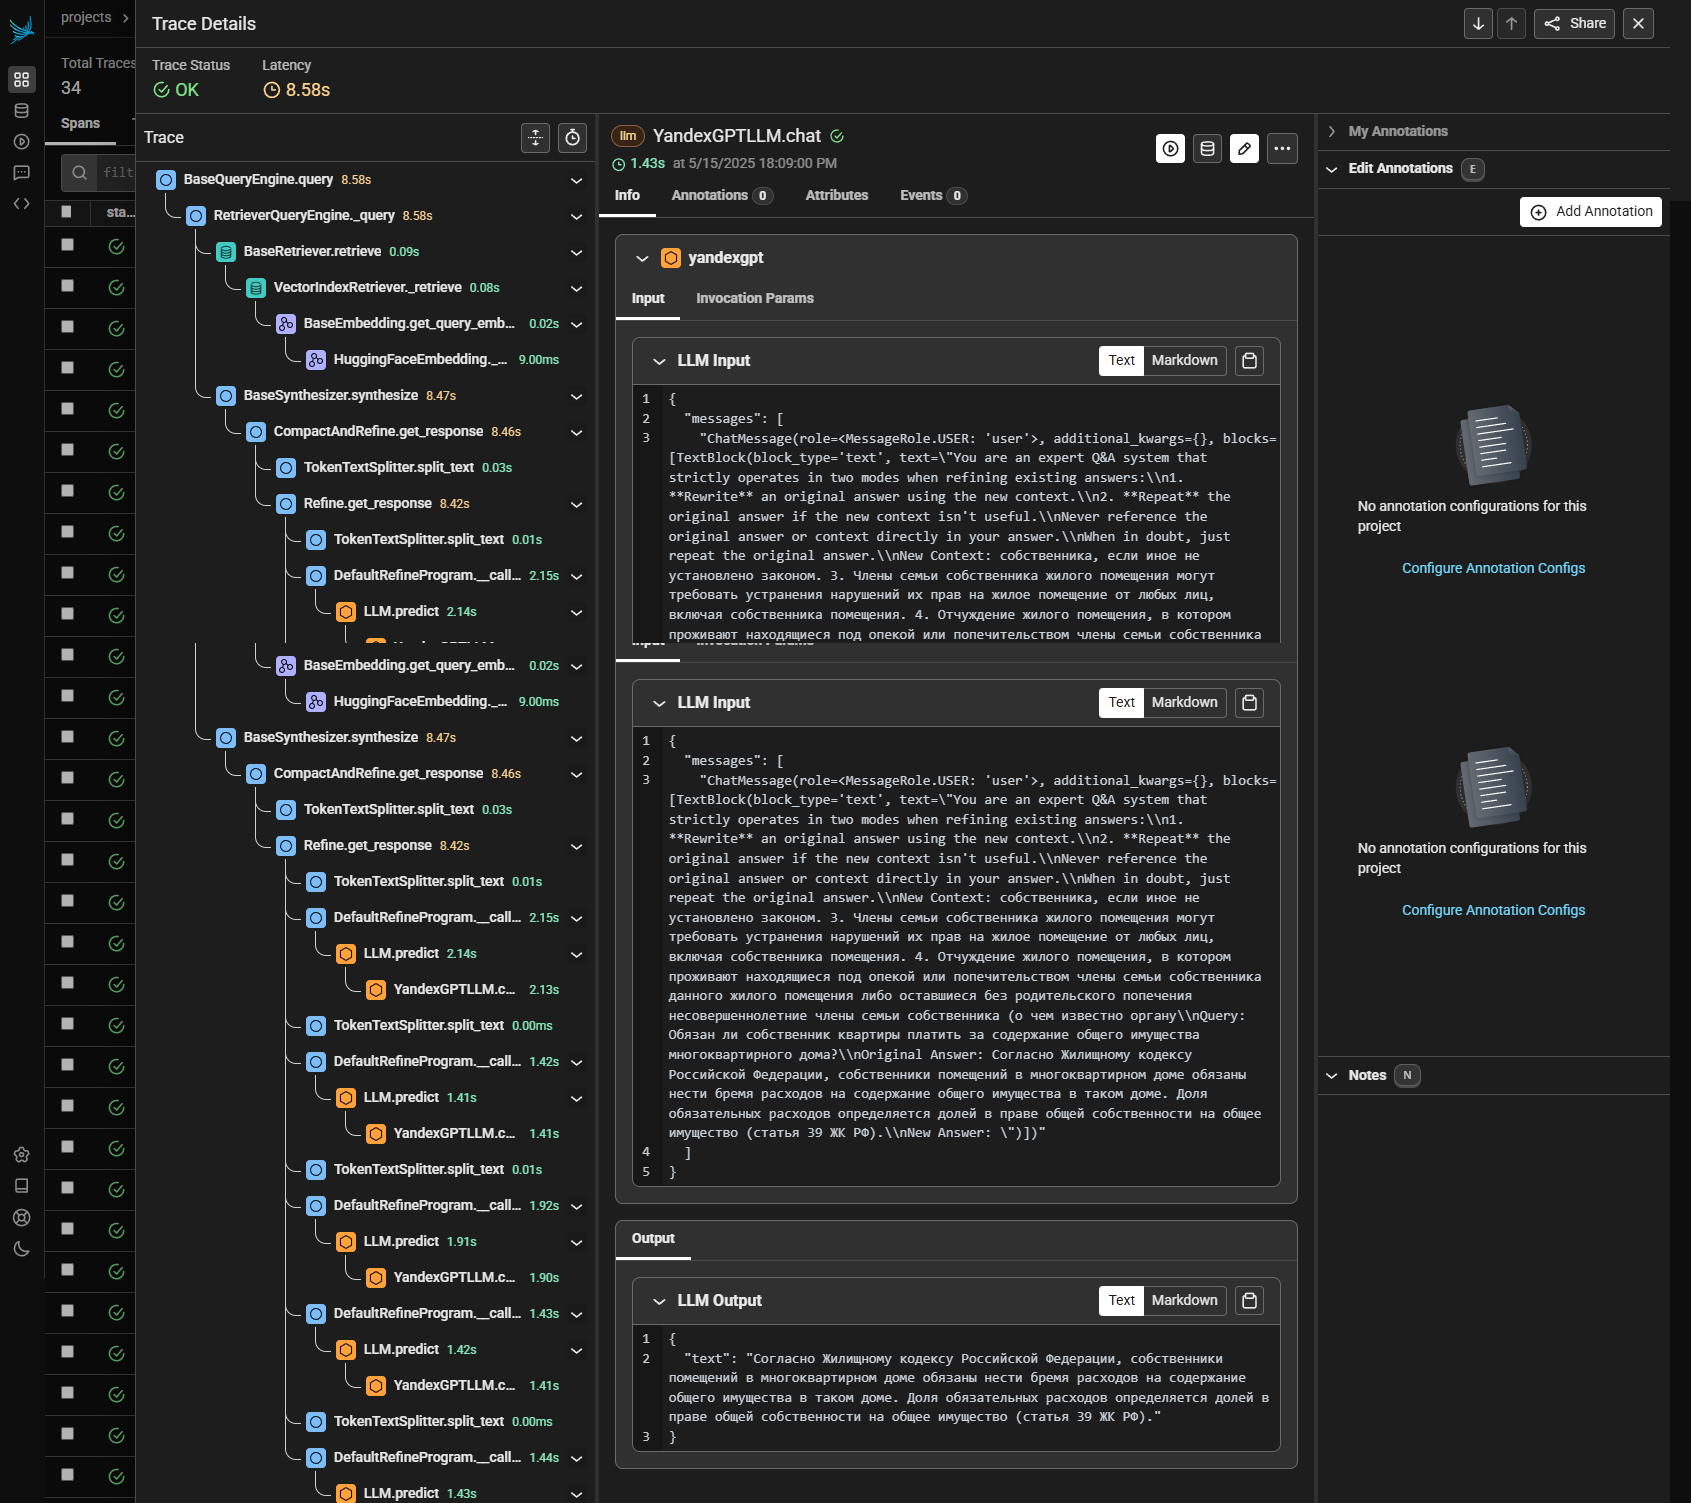

**This answer is completely true and legally correct.**

## Reranking

Reranking helps the NeuroLawyer select the most important legal fragments from the knowledge base before sending them to the LLM. Even if the answer is in the documents, it may not get to the LLM due to the token limit. Reranking solves this problem - it re-evaluates the importance of the found fragments so that the final answer takes into account the key legal provisions, and not random mentions.

ColBERT is a fast and accurate search model that enables BERT-based search to scale over large text collections in tens of milliseconds.

In [ ]:
!pip install llama-index-postprocessor-colbert-rerank

In [ ]:
from llama_index.core import (
    VectorStoreIndex,
    SimpleDirectoryReader,
)

In [ ]:
from llama_index.postprocessor.colbert_rerank import ColbertRerank

colbert_reranker = ColbertRerank(
    top_n=5,
    model="colbert-ir/colbertv2.0",
    tokenizer="colbert-ir/colbertv2.0",
    keep_retrieval_score=True,
)

query_engine = index.as_query_engine(
    similarity_top_k=10,
    node_postprocessors=[colbert_reranker],
)

tokenizer_config.json:   0%|          | 0.00/405 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [ ]:
response = query_engine.query("Is the owner of an apartment obliged to pay for the maintenance of the common property of an apartment building?")
print(response)

Согласно статье 39 ЖК РФ, собственники помещений в многоквартирном доме несут бремя расходов на содержание общего имущества в многоквартирном доме. Доля обязательных расходов определяется долей в праве общей собственности на общее имущество в таком доме указанного собственника.


translate: **According to Article 39 of the Housing Code of the Russian Federation, owners of premises in an apartment building bear the burden of expenses for the maintenance of common property in the apartment building. The share of mandatory expenses is determined by the share in the right of common ownership of the common property in such a building of the specified owner.**

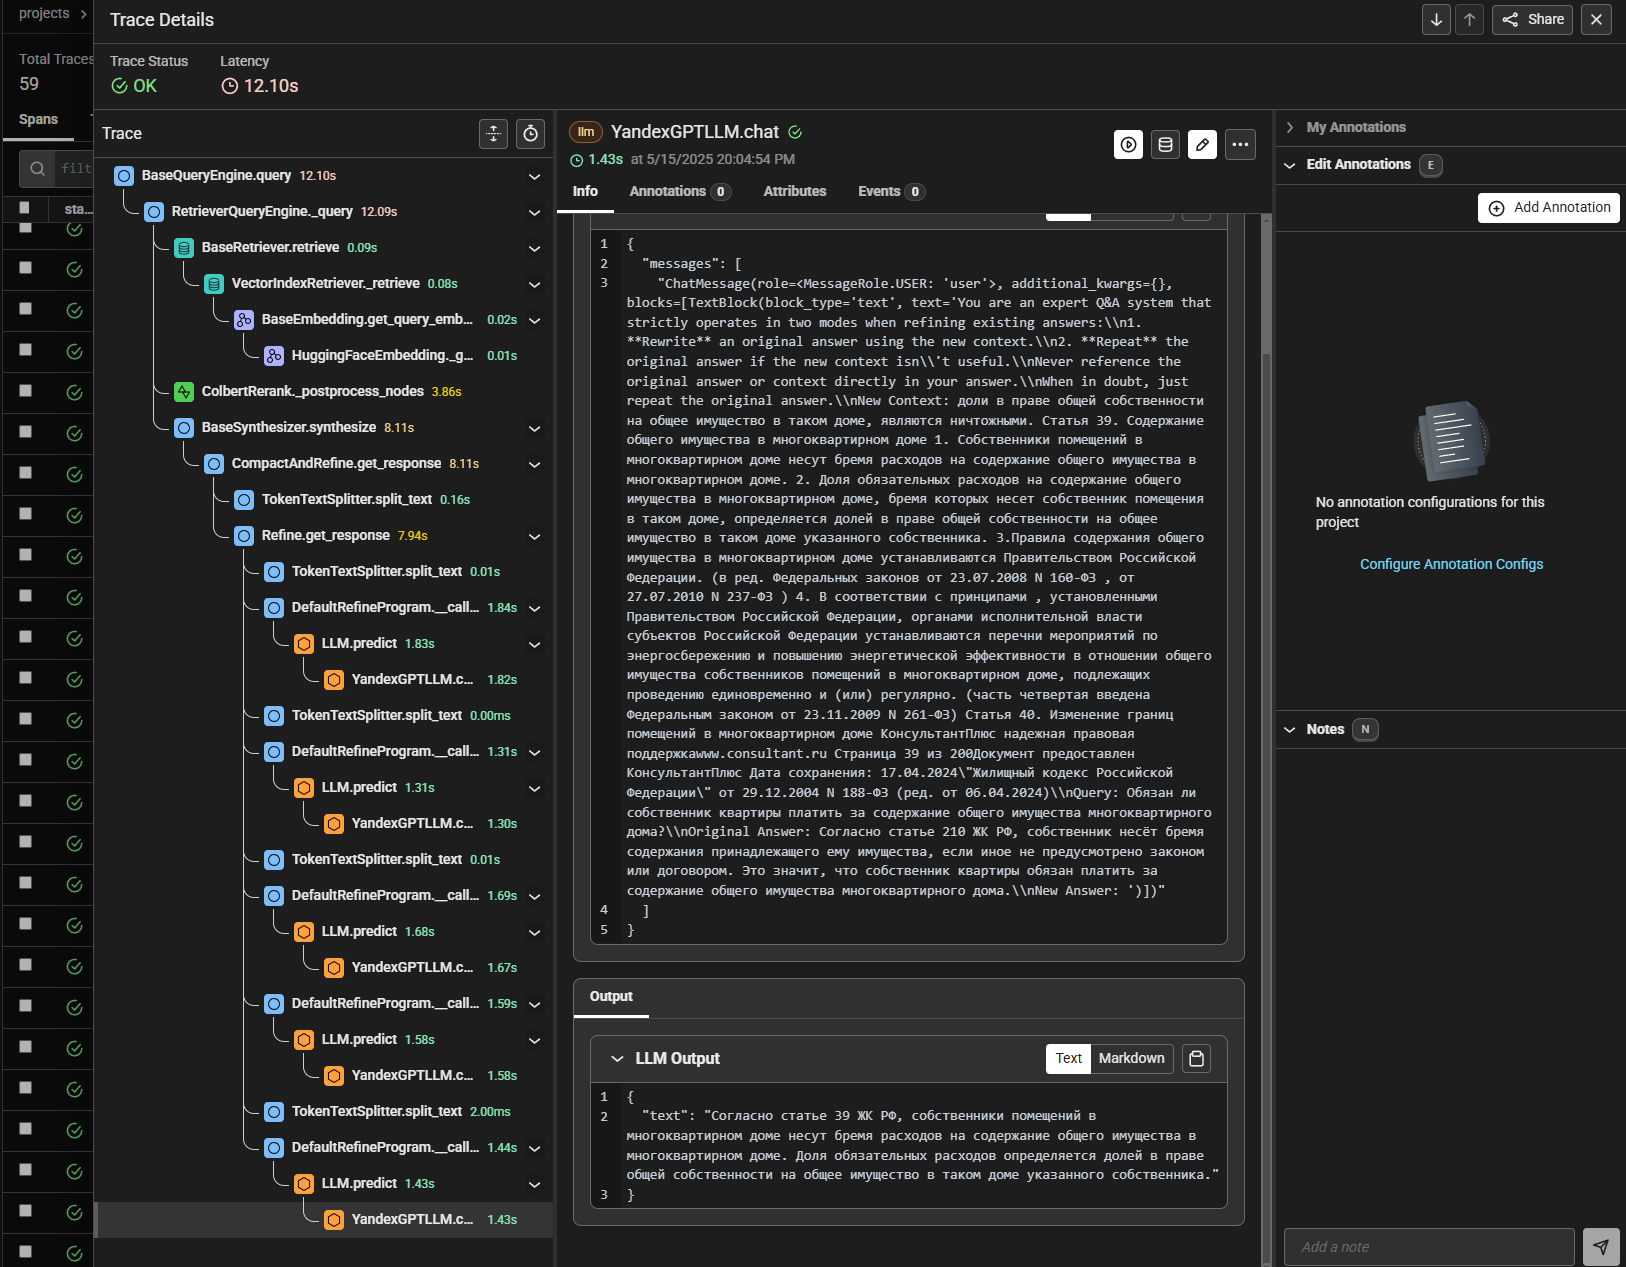

**The reranking has served its purpose very well.**

# Improving the RAG system

## Query caching

To avoid wasting resources on the same questions again.

In [ ]:
from llama_index.core.query_engine import RetrieverQueryEngine
from llama_index.core.storage.docstore import SimpleDocumentStore

query_engine = RetrieverQueryEngine.from_args(
    retriever=index.as_retriever(similarity_top_k=20),
    node_postprocessors=[colbert_reranker],
    response_mode="compact",
    use_async=True,
    docstore=SimpleDocumentStore(),
)

In [ ]:
query_cache = {}

def cached_query(query: str):
    if query in query_cache:
        print("Response from cache")
        return query_cache[query]
    else:
        response = query_engine.query(query)
        query_cache[query] = response
        print("LLM's response has been cached.")
        return response


Example of use:

In [ ]:
response1 = cached_query("Do you need to pay for major repairs?")
print(response1)

response2 = cached_query("Do you need to pay for major repairs?")
print(response2)


Ответ от LLM сохранён в кэш
Согласно Жилищному кодексу РФ, обязанность по оплате капитального ремонта лежит на собственниках помещений в многоквартирном доме. Точный порядок и условия оплаты определяются законодательством и могут зависеть от различных факторов, включая региональные особенности и статус дома. Для получения более точной информации о том, нужно ли платить за капитальный ремонт, следует обратиться к соответствующим статьям Жилищного кодекса Российской Федерации или проконсультироваться с юристом, специализирующимся на жилищном праве.
Ответ из кэша
Согласно Жилищному кодексу РФ, обязанность по оплате капитального ремонта лежит на собственниках помещений в многоквартирном доме. Точный порядок и условия оплаты определяются законодательством и могут зависеть от различных факторов, включая региональные особенности и статус дома. Для получения более точной информации о том, нужно ли платить за капитальный ремонт, следует обратиться к соответствующим статьям Жилищного кодекса Рос

translation:

**Answer from LLM saved to cache**

**According to the Housing Code of the Russian Federation, the responsibility for paying for major repairs lies with the owners of premises in an apartment building. The exact procedure and terms of payment are determined by law and may depend on various factors, including regional characteristics and the status of the building. For more accurate information on whether you need to pay for major repairs, you should refer to the relevant articles of the Housing Code of the Russian Federation or consult a lawyer specializing in housing law.**

**Answer from cache**

**According to the Housing Code of the Russian Federation, the responsibility for paying for major repairs lies with the owners of premises in an apartment building. The exact procedure and terms of payment are determined by law and may depend on various factors, including regional characteristics and the status of the building. For more accurate information on whether you need to pay for major repairs, you should refer to the relevant articles of the Housing Code of the Russian Federation or consult a lawyer specializing in housing law.**

This method can be improved to `semantic caching`.

Unlike regular caching, which relies on exact query matches, semantic caching uses vector representations of queries to determine their semantic similarity. This allows reuse of results for queries that are similar in meaning, even if they are formulated differently.

### Installing libraries

In [ ]:
!pip install sentence-transformers faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 81.8 MB/s eta 0:00:00


### Initialization of embeddings and FAISS

In [ ]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

# Embeddings model
embed_model = SentenceTransformer("all-MiniLM-L6-v2")

# Vector storage (FAISS)
dimension = 384 # embeddings model dimension
faiss_index = faiss.IndexFlatL2(dimension)

# Cache: [ID -> (request, response)]
semantic_cache = {}

### Wrapper around query_engine.query()

In [ ]:
from typing import Optional

def semantic_cached_query(query: str, threshold: float = 0.6, top_k: int = 1) -> Optional[str]:
    # Generate the embedding for the query
    query_embedding = embed_model.encode(query).astype("float32").reshape(1, -1)

    if faiss_index.ntotal > 0:
        # Search for the most similar query embedding in the FAISS index
        D, I = faiss_index.search(query_embedding, top_k)
        print(f"Distance: {D[0][0]:.4f} | Found ID: {I[0][0]}")

        # If the distance is below the similarity threshold, return the cached response
        if D[0][0] < threshold:
            matched_id = int(I[0][0])
            print(f"Response from cache (ID={matched_id}) → Request: {semantic_cache[matched_id][0]}")
            return semantic_cache[matched_id][1]

    # If no close enough match found, query the LLM
    response = query_engine.query(query)

    # Save the new query and response to the cache
    new_id = len(semantic_cache)
    faiss_index.add(query_embedding)
    semantic_cache[new_id] = (query, str(response))
    print(f"New response from LLM saved to cache (ID={new_id})")

    return response


### Usage

In [ ]:
# Clearing the cache
faiss_index.reset()
semantic_cache.clear()

# First query (will be cached)
print(semantic_cached_query("Is the property owner required to pay for major repairs?", threshold=0.6))

# Second query (will be found as semantically similar and will not trigger another LLM call)
print(semantic_cached_query("Does the apartment owner have to pay for capital renovation?", threshold=0.6))

Новый ответ от LLM сохранён в кэш (ID=0)
Не уверен. В предоставленных текстах нет информации, касающейся обязанности собственника платить за капремонт.
Расстояние: 0.5615 | Найден ID: 0
Ответ из кэша (ID=0) → Запрос: Обязан ли собственник платить за капремонт?
Не уверен. В предоставленных текстах нет информации, касающейся обязанности собственника платить за капремонт.


translate:
New response from LLM saved to cache (ID=0)

Not sure. The provided texts do not contain information regarding the obligation of the property owner to pay for major repairs.

Distance: 0.5615 | Found ID: 0

Response from cache (ID=0) → Query: Is the property owner required to pay for major repairs?

Not sure. The provided texts do not contain information regarding the obligation of the property owner to pay for major repairs.


1. The first query:

* `"Is the owner obliged to pay for major repairs?"` was sent to LLM,
* the answer was received,
* saved to the cache with `ID=0`.

2. The second query:

* `"Does the apartment owner have to pay for major repairs?"` was compared with the cache,
* the distance between the embeddings turned out to be `0.5615` (less than `threshold=0.6`),
* therefore, the second query received the answer from the cache with `ID=0` — everything is as it should be.

## Query Rewriting

Query Rewriting is especially useful in legal RAG systems. It helps turn an unclear or mundane query into a precise, legally worded question that will yield better document searches.

Before sending a query to `query_engine`, we first run it through LLM to have it reformulate the query to take into account the legal context.

### Prompt for rewriting

In [ ]:
from llama_index.core.llms import ChatMessage

def rewrite_query(original_query: str, llm) -> str:
prompt = f"""
You are a legal assistant. Reword the following question so that it is precise, brief, and understandable for searching by the Housing Code of the Russian Federation. Without adding links to laws, without brackets:

Question: "{original_query}"

Reworded question:
""".strip()

messages = [ChatMessage(role="user", content=prompt)]
rewritten = llm.chat(messages).message.content.strip()

print(f"✍️ Rewording: {rewritten}")
return rewritten

### Wrapper around `query_engine.query`

In [ ]:
def rewritten_query(query: str) -> str:
    rewritten = rewrite_query(query, Settings.llm)
    response = query_engine.query(rewritten)
    return response

### Usage example

In [ ]:
response = rewritten_query("I don't live in the apartment, should I pay for major repairs?")
print(response)

✍️ Переформулировка: Обязан ли собственник квартиры платить за капитальный ремонт, если он в ней не проживает? (статья 154 ЖК РФ)
Согласно статье 154 ЖК РФ, собственники квартир обязаны оплачивать коммунальные платежи, включая взносы на капитальный ремонт, независимо от факта проживания в квартире.


translate:
✍️ Rewording: Is the owner of an apartment obliged to pay for major repairs if he does not live in it? (Article 154 of the Housing Code of the Russian Federation)
According to Article 154 of the Housing Code of the Russian Federation, apartment owners are obliged to pay utility bills, including contributions for major repairs, regardless of whether they live in the apartment.

# Filtering queries

We implement the filter using OpenAI's GPT-4o as an intelligent security agent.

## Installing the library

In [ ]:
!pip install openai

## Securely enter OpenAI key via getpass

In [ ]:
from openai import OpenAI
from getpass import getpass

# Enter your OpenAI API key
api_key = getpass("Enter your OpenAI API key: ")

# Create an OpenAI client
client = OpenAI(api_key=api_key)


Введите ваш OpenAI API ключ: ··········


## Функция `is_prompt_safe_gpt4o`

In [ ]:
def is_prompt_safe_gpt4o(prompt: str) -> bool:
    system_prompt = (
        "You are a security filter assistant. "
        "Your task is to determine whether the user input is SAFE or UNSAFE. "
        "Reply ONLY with one word: 'safe' or 'unsafe'. "
        "Mark as unsafe anything that is illegal, unethical, violent, harmful, or violates privacy laws."
    )

    try:
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": prompt}
            ],
            temperature=0,
        )
        verdict = response.choices[0].message.content.strip().lower()
        print(f"🛡️ GPT-4o filter response: {verdict}")
        return verdict == "safe"
    except Exception as e:
        print(f"⚠️ Error during safety check: {e}")
        return False  # Better to block on error


## Wrapper for secure query in RAG

In [ ]:
def safe_query(prompt: str, query_engine) -> str:
    if is_prompt_safe_gpt4o(prompt):
        return query_engine.query(prompt)
    else:
        return "🚫 Your request violates security rules and cannot be processed."

## Usage:

In [ ]:
user_prompt = "How to move into someone else's apartment without a contract?"

response = safe_query(user_prompt, query_engine)
print(response)

🛡️ GPT-4o фильтр ответил: unsafe
🚫 Ваш запрос нарушает правила безопасности и не может быть обработан.


🛡️ GPT-4o filter responded: unsafe

🚫 Your request violates security rules and cannot be processed.

# We combine all our RAG system functions into one

In [ ]:
def smart_query(
    user_query: str,
    query_engine,
    faiss_index,
    semantic_cache,
    embed_model,
    rewrite_llm,
    client_gpt4o,
    safety_threshold: float = 0.6,
    top_k: int = 1
) -> str:
    # Step 1. Safety check
    if not is_prompt_safe_gpt4o(user_query, client_gpt4o):
        return "🚫 Your query violates safety guidelines and cannot be processed."

    # Step 2. Query rewriting
    rewritten_query = rewrite_query(user_query, rewrite_llm)

    # Step 3. Attempt to retrieve from semantic cache
    query_embedding = embed_model.encode(rewritten_query).astype("float32").reshape(1, -1)

    if faiss_index.ntotal > 0:
        D, I = faiss_index.search(query_embedding, top_k)
        print(f"🔎 Distance: {D[0][0]:.4f} | Found ID: {I[0][0]}")
        if D[0][0] < safety_threshold:
            matched_id = int(I[0][0])
            print(f"✅ Response from cache (ID={matched_id}) → Rewritten: {semantic_cache[matched_id][0]}")
            return semantic_cache[matched_id][1]

    # Step 4. Query the engine
    response = query_engine.query(rewritten_query)

    # Step 5. Save to cache
    new_id = len(semantic_cache)
    faiss_index.add(query_embedding)
    semantic_cache[new_id] = (rewritten_query, str(response))
    print(f"💾 New response from LLM saved to cache (ID={new_id})")

    return response


Updated version of `is_prompt_safe_gpt4o` with `client` argument:

In [ ]:
def is_prompt_safe_gpt4o(prompt: str, client) -> bool:
    system_prompt = (
        "You are a security filter assistant. "
        "Your task is to determine whether the user input is SAFE or UNSAFE. "
        "Reply ONLY with one word: 'safe' or 'unsafe'. "
        "Mark as unsafe anything that is illegal, unethical, violent, harmful, or violates privacy laws."
    )

    try:
        response = client.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": prompt}
            ],
            temperature=0,
        )
        verdict = response.choices[0].message.content.strip().lower()
        print(f"🛡️ GPT-4o filter response: {verdict}")
        return verdict == "safe"
    except Exception as e:
        print


## Example of usage:

To clear the semantic cache

In [ ]:
faiss index.reset()
semantic cache.clear()
print("Cache cleared.")

Кэш очищен.


In [ ]:
response = smart_query(
    user_query="How to disable a water meter?",
    query_engine=query_engine,
    faiss_index=faiss_index,
    semantic_cache=semantic_cache,
    embed_model=embed_model,
    rewrite_llm=Settings.llm,
    client_gpt4o=client
)

print(response)


🛡️ GPT-4o фильтр ответил: unsafe
🚫 Ваш запрос нарушает правила безопасности и не может быть обработан.


🛡️ GPT-4o filter responded: unsafe

🚫 Your request violates security rules and cannot be processed.

In [ ]:
response = smart_query(
    user_query="Is the owner of an apartment obliged to pay for the maintenance of the common property of an apartment building?",
    query_engine=query_engine,
    faiss_index=faiss_index,
    semantic_cache=semantic_cache,
    embed_model=embed_model,
    rewrite_llm=Settings.llm,
    client_gpt4o=client
)

print(response)

🛡️ GPT-4o фильтр ответил: safe
✍️ Переформулировка: Обязан ли собственник квартиры оплачивать расходы на содержание общего имущества в многоквартирном доме?
💾 Новый ответ от LLM сохранён в кэш (ID=0)
Да, собственник квартиры обязан оплачивать расходы на содержание общего имущества в многоквартирном доме. Согласно статье 210 ГК РФ, собственник несёт бремя содержания принадлежащего ему имущества, если иное не предусмотрено законом или договором.


🛡️ GPT-4o filter replied: safe

✍️ Rewording: Is the owner of the apartment obliged to pay the costs of maintaining common property in an apartment building?

💾 New answer from LLM saved to cache (ID=0)

Yes, the owner of the apartment is obliged to pay the costs of maintaining common property in an apartment building. According to Article 210 of the Civil Code of the Russian Federation, the owner bears the burden of maintaining the property belonging to him, unless otherwise provided by law or agreement.

In [ ]:
response = smart_query(
    user_query="But I didn’t sign any papers with this manager, I don’t even live there, why should I pay them?",
    query_engine=query_engine,
    faiss_index=faiss_index,
    semantic_cache=semantic_cache,
    embed_model=embed_model,
    rewrite_llm=Settings.llm,
    client_gpt4o=client
)

print(response)

🛡️ GPT-4o фильтр ответил: safe
✍️ Переформулировка: Обязан ли человек платить управляющей компании, если он не проживает в квартире и не подписывал договор с управляющей компанией?
🔎 Расстояние: 0.5611 | Найден ID: 0
✅ Ответ из кэша (ID=0) → Переформулированный: Обязан ли собственник квартиры оплачивать расходы на содержание общего имущества в многоквартирном доме?
Да, собственник квартиры обязан оплачивать расходы на содержание общего имущества в многоквартирном доме. Согласно статье 210 ГК РФ, собственник несёт бремя содержания принадлежащего ему имущества, если иное не предусмотрено законом или договором.


🛡️ GPT-4o filter replied: safe

✍️ Rewording: Is a person obliged to pay the management company if he does not live in the apartment and has not signed an agreement with the management company?

🔎 Distance: 0.5611 | Found ID: 0

✅ Answer from cache (ID=0) → Rewording: Is the owner of an apartment obliged to pay the costs of maintaining common property in an apartment building?
Yes, the owner of an apartment is obliged to pay the costs of maintaining common property in an apartment building. According to Article 210 of the Civil Code of the Russian Federation, the owner bears the burden of maintaining the property belonging to him, unless otherwise provided by law or agreement.

## Conclusion

As you can see, the system generally functions correctly: semantic search and reformulation work. However, it has an important drawback - although it finds relevant articles, it does not always cover the entire regulatory framework on the topic.

For example, to the following request:

> "Is the owner of an apartment obliged to pay for the maintenance of common property in an apartment building?"

the system gave the following answer:

> Yes, the owner of an apartment is obliged to pay for the maintenance of common property in an apartment building. According to Article 210 of the Civil Code of the Russian Federation, the owner bears the burden of maintaining the property belonging to him, unless otherwise provided by law or agreement.

Formally, the answer is correct, but insufficient. Article 210 of the Civil Code of the Russian Federation is general in nature and does not disclose all the features associated with the responsibilities of owners in apartment buildings.

For accuracy, the system should also have referred to Articles 158 and 39 of the Housing Code of the Russian Federation, which directly regulate this issue and clarify the proportionality of participation in expenses and the calculation of shares.